Анализ динамики цен авокадо в США (данные от Hass Avocado Board).         
**Описание данных:**          
Date — дата         
AveragePrice — средняя цена одного авокадо          
Total Volume — количество проданных авокадо          
4046 — количество проданных авокадо PLU* 4046           
4225 — количество проданных авокадо PLU 4225          
4770 — количество проданных авокадо PLU 4770         
Total Bags — всего упаковок       
Small Bags — маленькие упаковки          
Large Bags — большие         
XLarge Bags — очень большие          
type — обычный или органический         
year — год       
Region — город или регион the city or region of the observation       
*PLU — код товара (Product Lookup code)       

В датафрейме находятся данные не за каждый день, а за конец каждой недели.        

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates

In [69]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

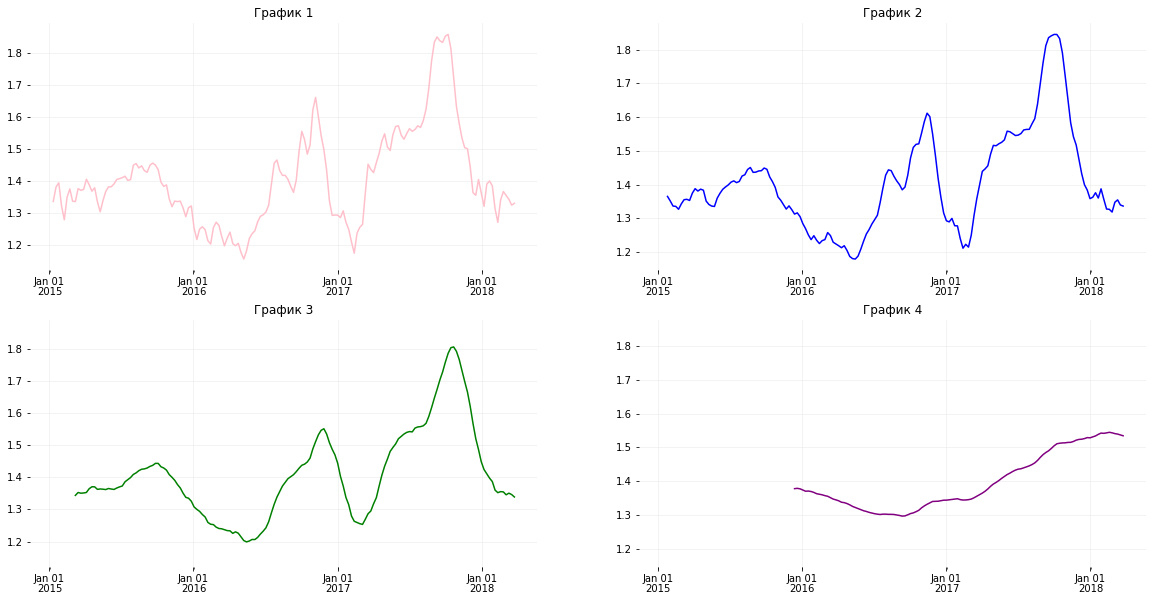

In [17]:
# Строим графики скользящего среднего для цены авокадо с окнами  [2, 4, 10, 50] - посмотрим, как изменятся графики
# в зависимости от выбранного окна

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
windows = [2, 4, 10, 50]
colors = ['pink', 'blue', 'green', 'purple']

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
    
for ax in axes.flatten():
    # удаляем рамку
    ax.set_frame_on(False)  
    
    # устанавливаем major locator – 1 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=1))  
    
    # показывать в формате сокращенного названия месяца и дня (Jan 01)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=2))
    
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
for name, ax in zip(['1','2','3','4'], axes.flatten()):
    ax.set(title='График {}'.format(name))
    ax.tick_params(labelbottom=True, which='both')

In [20]:
# Найдем максимальное скользящее среднее для цены авокадо:

round(avocado_mean.rolling(window=3).mean().max(),2)

1.85

In [21]:
# Посчитаем экспоненциальное скользящее среднее для цены авокадо:

avocado_ewm = avocado_mean.ewm(span = 2).mean()
avocado_ewm 

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [44]:
# Импортируем полные данные о ценах на авокадо (ежедневные):

avocado = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_full.csv", index_col=0)
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [55]:
roll['2017-02-19']

1.223

In [56]:
ewm = avocado_mean.ewm(span = 4).mean().round(3)
ewm['2016-08-21']

1.418

In [57]:
ewm['2017-02-19']

1.237

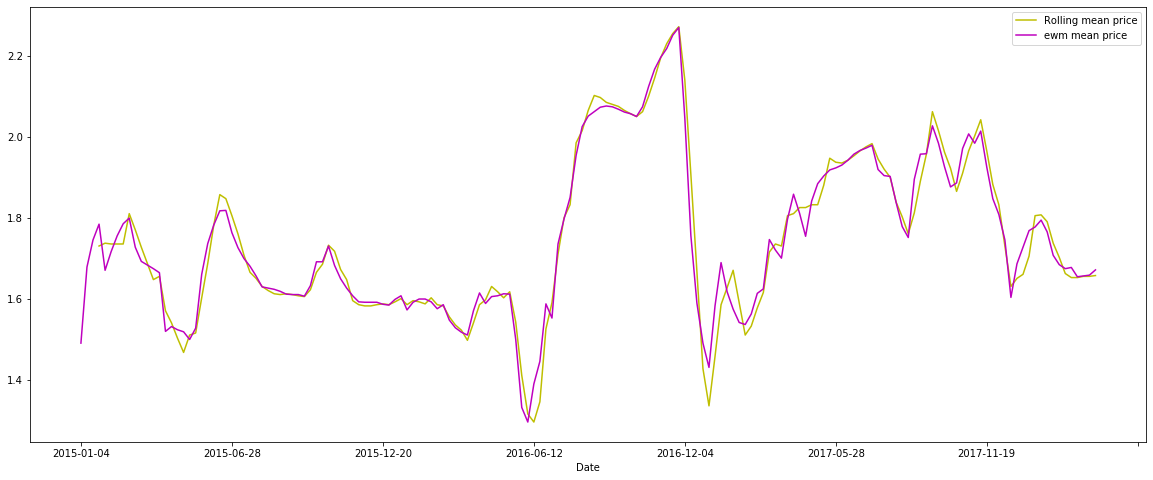

In [33]:
# Для авокадо типа organic в Чикаго построим скользящее среднее с окном 4 и экспоненциальное скользящее 
# среднее с параметром span=4, сравним их графики

plt.figure(figsize=(20,8))
avocado.query('type == "organic" and region == "Chicago"').AveragePrice.rolling(window=4).mean().round(3).plot(color='y')
avocado.query('type == "organic" and region == "Chicago"').AveragePrice.ewm(span = 4).mean().round(3).plot(color='m')
plt.legend(['Rolling mean price','ewm mean price'])


In [77]:
avocado.query('type == "organic" and region == "Chicago"')\
              .AveragePrice.rolling(window=4).mean().round(3)['2016-08-21']

2.102

In [78]:
avocado.query('type == "organic" and region == "Chicago"')\
              .AveragePrice.rolling(window=4).mean().round(3)['2017-02-19']

1.532

In [80]:
avocado.query('type == "organic" and region == "Chicago"')\
              .AveragePrice.ewm(span = 4).mean().round(3)['2016-08-21']

2.062

In [81]:
avocado.query('type == "organic" and region == "Chicago"')\
              .AveragePrice.ewm(span = 4).mean().round(3)['2017-02-19']

1.562

Ряд, полученный с помощью экспоненциального скользящего среднего на промежутке от с июля 2016 до декабря 2016 является более сглаженным. Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна 2.102, что  больше чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось 1.562, и было больше чем при использовании rolling(), для которого значение было равно 1.532.
